In [39]:
import vvp_project_support as sup
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

__obecný postup__<br>
1. Vytvořit/nahrát bludiště do true/false matice<br>
2. Sestrojit matice incidence pro bludiště<br>
3. Pomocí Dijkstrova algoritmu najít nejrychlejší cestu<br>
4. Přetransformovat cestu do matice.

Úkázka grafu průchozích buněk bludiště

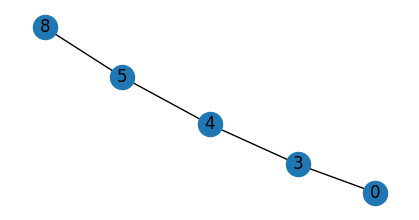

In [40]:
maze = sup.load_document('data/maze_0.csv')
inc_1 = sup.incidence_matrix(maze)

plt.figure(figsize=(4,2))
sup.draw_nx_graph(inc_1)
plt.show()

Vykreslení jakéhokoliv bludiště, porovnání původního a nejkratší trasy

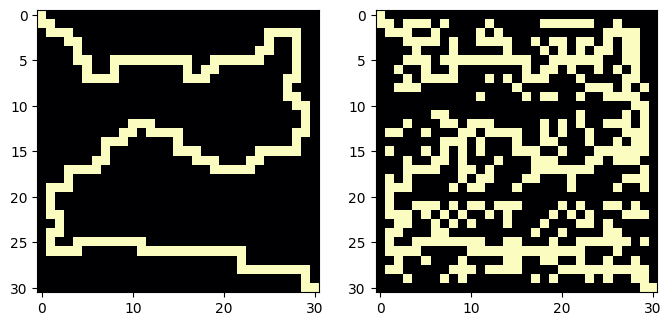

In [41]:
maze = sup.load_document('data/maze_5.csv')
inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
path_matrix = sup.create_path_matrix(maze,path)

fig = plt.figure(figsize=(8,4))
axs = fig.subplots(1, 2) 
axs[0].imshow(path_matrix, cmap = 'magma_r')
axs[1].imshow(maze, cmap = 'magma_r')
plt.show()

Zobrazení nejkratší trasy v bludišti

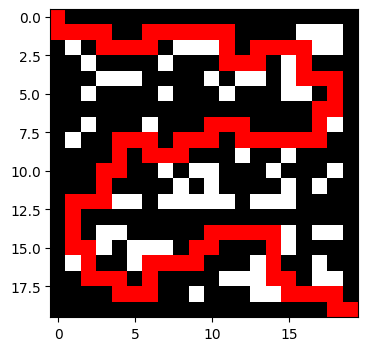

In [42]:
maze = sup.load_document('data/maze_2.csv')
inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
path_matrix = sup.create_path_matrix(maze,path)

final_matrix = maze + path_matrix

plt.figure(figsize=(8,4))
cmap = plt.cm.colors.ListedColormap(['red', 'white', 'black'])
plt.imshow(final_matrix, cmap=cmap)
plt.show()

Konečný kod s všemi funkcemi.<br>
Lze nastavit velikost matice a přednastavené šablony.

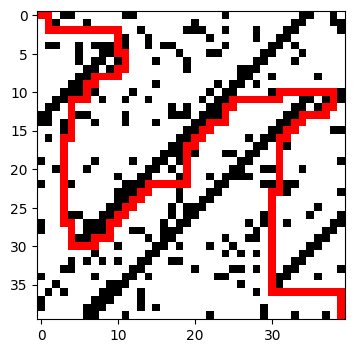

In [45]:
"""
Templates - druhý argument generator_maze funkce
0 == Blank
1 == Slalom diagonal
2 == Big Diag
3 == Slalom horizontal
"""

maze = sup.generator_maze(40,1) #první argument - velikost matice, druhý argument - šablona
inc = sup.incidence_matrix(maze)
path = sup.dijkstra(inc,maze)
path_matrix = sup.create_path_matrix(maze,path)

final_matrix = maze + path_matrix

plt.figure(figsize=(8,4))
cmap = plt.cm.colors.ListedColormap(['red', 'white', 'black'])
plt.imshow(final_matrix, cmap=cmap)
plt.show()

__Bonus:__ kontrola šablon 

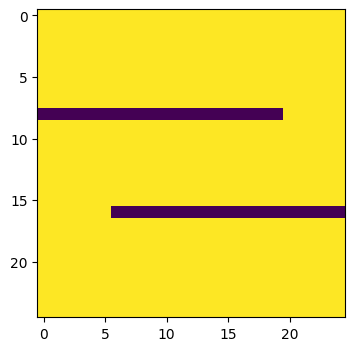

In [44]:
n = 25 #!  templates are for sizes bigger than 14

#*napis sablonu
tretina = int(n/3)
indexy = [(i,j) for i in range(n) for j in range(n) if not ((i == tretina and j<n*4/5) or (i == 2*tretina and j>n/5))]

matrix = np.zeros((n,n))
for i in range(len(indexy)):
    u,j = indexy[i]
    matrix[u,j] = 1
plt.figure(figsize=(8,4))
plt.imshow(matrix)
plt.show()